In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Load the Titanic dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Show basic info about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
# Load dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)

# Numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumerical Features:", numerical_features)

Categorical Features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Numerical Features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [6]:
# Fix missing values
# Fill missing Age with the median (middle value)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with the most common value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop columns we don’t need or have too many missing values
# Cabin column has more missing values
# i am dropping remaning columns as we don't need them
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Check that no missing values remain
print("Missing values after fixing:")
print(df.isnull().sum())

Missing values after fixing:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


C:\Users\abhig\AppData\Local\Temp\ipykernel_31128\2774145352.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\abhig\AppData\Local\Temp\ipykernel_31128\2774145352.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Converting Texts to Numbers

In [8]:
# Convert text columns to numbers
# Change Sex: male -> 0, female -> 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Change Embarked (S, C, Q) to new columns (one-hot encoding)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [9]:
# Show the dataset after encoding
print("Dataset after encoding:")
df.head()

Dataset after encoding:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


### Standardizing Numbers

In [10]:
# Standardize numbers so they’re on the same scale
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
#Create a Scalar
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Show the dataset after standardization
print("Dataset after standardization:")

df.head()

Dataset after standardization:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,0.432793,-0.473674,-0.502445,False,True
1,1,1,1,0.663861,0.432793,-0.473674,0.786845,False,False
2,1,3,1,-0.258337,-0.474545,-0.473674,-0.488854,False,True
3,1,1,1,0.433312,0.432793,-0.473674,0.420730,False,True
4,0,3,0,0.433312,-0.474545,-0.473674,-0.486337,False,True


### Before Removing outliers

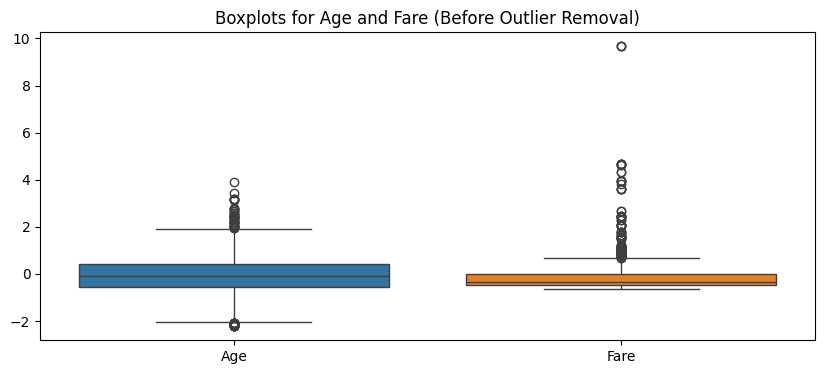

In [11]:
# Visualize outliers with boxplots for Age and Fare (before removal)
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplots for Age and Fare (Before Outlier Removal)")
plt.savefig('boxplots_before.png')  # Save before plot
plt.show()

### After Removing Outliers

In [12]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')

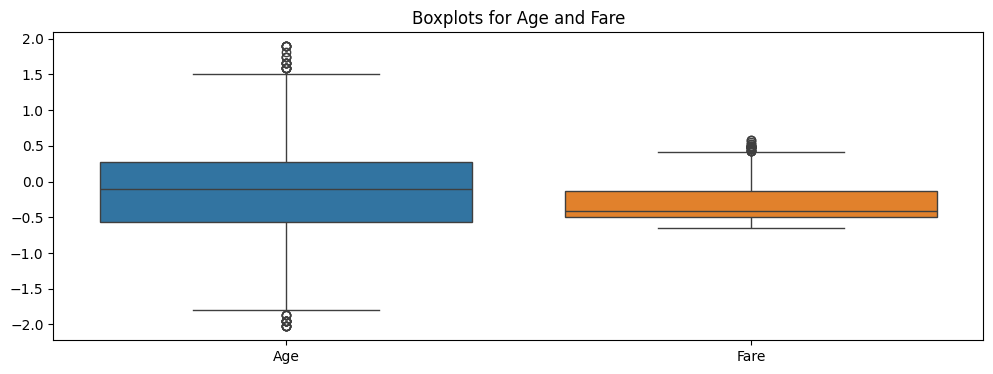

In [13]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplots for Age and Fare")
plt.savefig('boxplots_after.png')  # Save after plot
plt.show()

In [14]:
# Show the final dataset size
print("Final dataset shape after removing outliers:", df.shape)

Final dataset shape after removing outliers: (718, 9)


In [15]:
# Save the cleaned dataset
df.to_csv('cleaned_titanic.csv', index=False)
print("Cleaned dataset saved as 'cleaned_titanic.csv'")

Cleaned dataset saved as 'cleaned_titanic.csv'
